In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
import math
plt.style.use('seaborn-poster')

C:\Users\maria\AppData\Local\Temp\ipykernel_6120\282003503.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [2]:
@np.vectorize
def calculo_iqb(Ts, Fs):
    """Calcula o índice de qualidade do banho (iqb).
    
    Argumentos:
        Ts (float): Temperatura de saída do chuveiro.
        Fs (float): Vazão da válvula de saída.

    Retorna:
        iqb (float): Índice de qualidade do banho.
    """
    iqb = (1 / math.e) * math.exp((1 - ((Ts - 38 + 0.02 * Fs) / 2) ** 2) * np.power((0.506 + math.log10(math.log10((10000 * np.sqrt(Fs)) / (10 + Fs + 0.004 * np.power(Fs, 4))))), 20))

    #if np.isnan(iqb) or iqb == None or np.isinf(abs(iqb)):
    #    iqb = 0
        
    return iqb

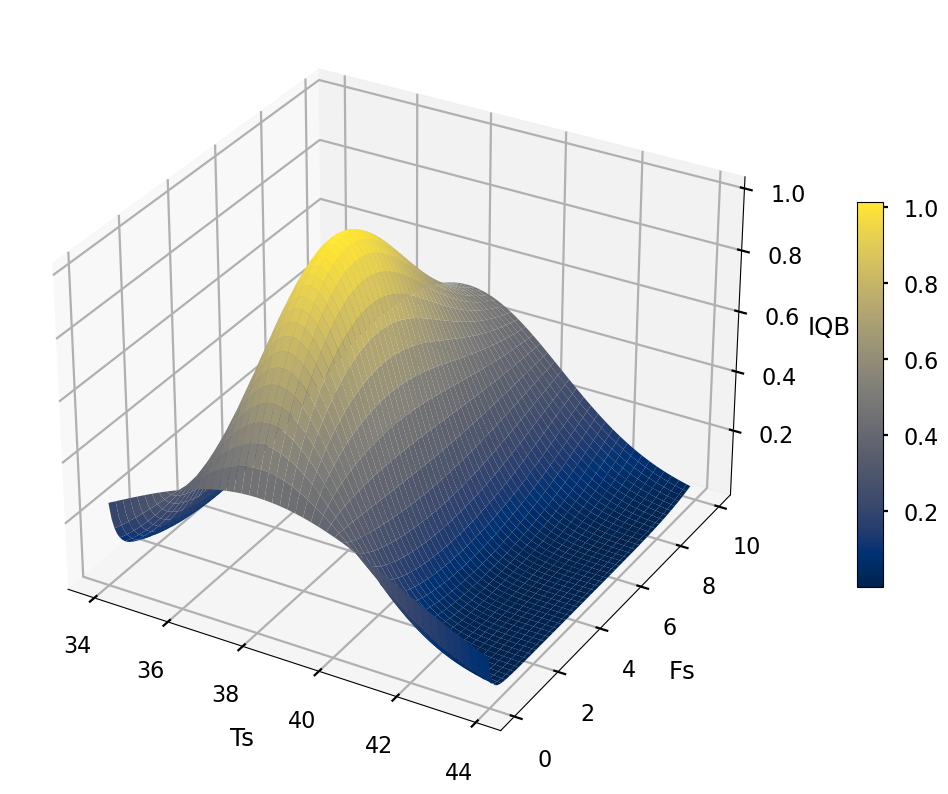

In [3]:
fig = plt.figure(figsize = (20, 10))
ax = plt.axes(projection='3d')

fs = np.arange(0.1, 10, 0.1) # Fs
ts = np.arange(34, 44, 0.1) # T4a

Fs, Ts = np.meshgrid(fs, ts)
IQB = calculo_iqb(Ts, Fs)

surf = ax.plot_surface(Ts, Fs, IQB, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('Ts', labelpad=20)
ax.set_ylabel('Fs', labelpad=20)
ax.set_zlabel('IQB', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=15)

plt.show()